In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
def generate_circle(r, mean, N):
    t = np.random.uniform(-np.pi, np.pi, N)
    epsilon = np.random.normal(0, 0.1, N)
    x = mean[0] + (r + epsilon)*np.cos(t)
    y = mean[1] + (r + epsilon)*np.sin(t)
    return np.array([x, y]).T

def Multiclass_LS_classifier(n_class, X, Y, c):
    m,n = X.shape[:]
    X_train = np.ones((m, n + 1))
    X_train[:,:-1] = X
    I = np.identity(n+1)
    W = []
    for i in range(0, n_class):
        Y_train = np.zeros(m)
        Y_train[np.where(Y == i)] = 1
        Y_train[np.where(Y != i)] = 0
        W_sub = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + c*I), X_train.T), Y_train.T)
        W.append(W_sub.T)
    return np.array(W)

def predict_Multiclass_LS_classifier(W, X, Y):
    n_class = W.shape[0]
    m,n = X.shape[:]
    X_test = np.ones((m, n + 1))
    X_test[:,:-1] = X
    Y_test = np.dot(X_test, W.T)
    Y_predict = np.argmax(Y_test, axis=1)
    return Y_predict, (np.sum(Y_predict == Y.T))/m

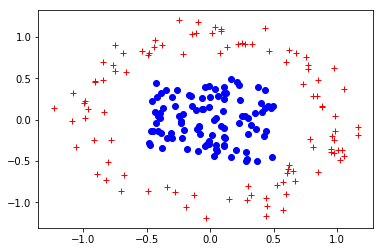

In [2]:
N = 100
X1 = np.random.uniform([-0.5, -0.5], [0.5, 0.5], (N, 2))
#X1 = generate_circle(0.2, np.array([0, 0]), N)
Y1 = 0*np.ones(N)
X2 = generate_circle(1, np.array([0, 0]), N)
Y2 = 1*np.ones(N)
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

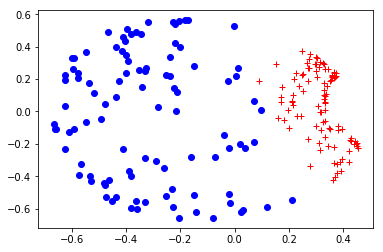

In [3]:
X_train = np.concatenate([X1, X2])
Y_train = np.concatenate([Y1, Y2])
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)
kpca.fit(X_train)
X1T =  kpca.transform(X1)
X2T =  kpca.transform(X2)
XT_train = np.concatenate([X1T, X2T])
plt.plot(X1T[:,0], X1T[:,1], 'bo')
plt.plot(X2T[:,0], X2T[:,1], 'r+')
plt.show()

In [4]:
W = Multiclass_LS_classifier(2, X_train, Y_train, 0)
_, acc = predict_Multiclass_LS_classifier(W, X_train, Y_train)
print("before transforming: ", acc)
W = Multiclass_LS_classifier(2, XT_train, Y_train, 0)
_, acc = predict_Multiclass_LS_classifier(W, XT_train, Y_train)
print("after transforming: ", acc)


before transforming:  0.605
after transforming:  0.955


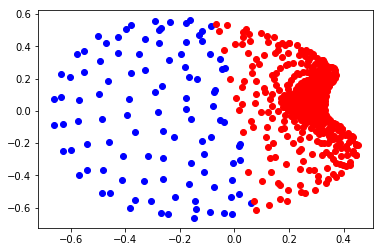

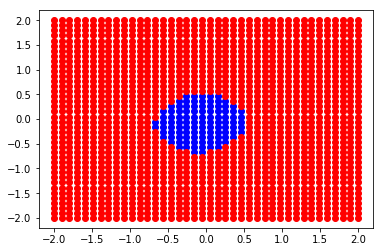

In [5]:
grid = np.meshgrid(np.linspace(-2,2,40), np.linspace(-2,2,40))
X_grid = np.array([grid[0].ravel(), grid[1].ravel()]).T
XT_grid = kpca.transform(X_grid)
Y_pred, acc = predict_Multiclass_LS_classifier(W, XT_grid, np.zeros(40*40))
XT_grid1 = XT_grid[Y_pred==0]
XT_grid2 = XT_grid[Y_pred==1]
plt.plot(XT_grid1[:,0], XT_grid1[:,1], "bo")
plt.plot(XT_grid2[:,0], XT_grid2[:,1], "ro")
plt.show()
X_grid1 = X_grid[Y_pred==0]
X_grid2 = X_grid[Y_pred==1]
plt.plot(X_grid1[:,0], X_grid1[:,1], "bo")
plt.plot(X_grid2[:,0], X_grid2[:,1], "ro")
plt.show()

pc ratio:  [0.53336191 0.46663809]


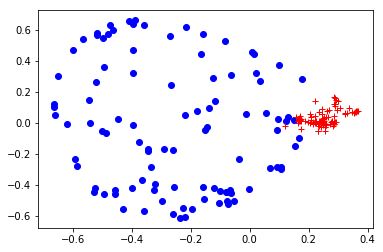

In [6]:
pca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
pca.fit(X_train)
print("pc ratio: ", pca.lambdas_/np.sum(pca.lambdas_))
X1T =  pca.transform(X1)
X2T =  pca.transform(X2)
XT_train = np.concatenate([X1T, X2T])
plt.plot(X1T[:,0], X1T[:,1], 'bo')
plt.plot(X2T[:,0], X2T[:,1], 'r+')
plt.show()

In [7]:
W = Multiclass_LS_classifier(2, X_train, Y_train, 0)
_, acc = predict_Multiclass_LS_classifier(W, X_train, Y_train)
print("before transforming: ", acc)
W = Multiclass_LS_classifier(2, XT_train, Y_train, 0)
_, acc = predict_Multiclass_LS_classifier(W, XT_train, Y_train)
print("before transforming: ", acc)

before transforming:  0.605
before transforming:  0.91


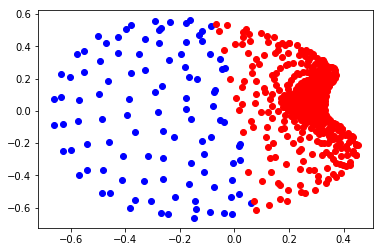

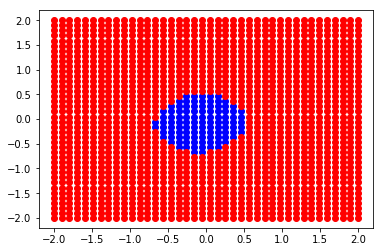

In [8]:
grid = np.meshgrid(np.linspace(-2,2,40), np.linspace(-2,2,40))
X_grid = np.array([grid[0].ravel(), grid[1].ravel()]).T
XT_grid = kpca.transform(X_grid)
Y_pred, acc = predict_Multiclass_LS_classifier(W, XT_grid, np.zeros(40*40))
XT_grid1 = XT_grid[Y_pred==0]
XT_grid2 = XT_grid[Y_pred==1]
plt.plot(XT_grid1[:,0], XT_grid1[:,1], "bo")
plt.plot(XT_grid2[:,0], XT_grid2[:,1], "ro")
plt.show()
X_grid1 = X_grid[Y_pred==0]
X_grid2 = X_grid[Y_pred==1]
plt.plot(X_grid1[:,0], X_grid1[:,1], "bo")
plt.plot(X_grid2[:,0], X_grid2[:,1], "ro")
plt.show()